<a href="https://colab.research.google.com/github/Ireneyou33/Sentiment-Analysis-Using-LSTM/blob/master/IMDb_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Sequential problems**: <br> the order of the features presented to the model is important for making predictions.
*   **Sentiment Analysis**: <br> the prediction of the positivity of a text.

## RNN

Break the raw input into time steps. For instance, break up the sentence into individual words. Each layer in RNN passes its output to the next layer. The intermediate output passed from layer to layer is known as the hidden state. Essentially, the hidden state allows an RNN to maintain a memory of the intermediate states from the sequential data.

**The vanishing gradient problem**:
<br> The vanishing gradient problem is a problem when training DNN using gradient-based methids such as backpropagation. In particular, the loss function provides information on the accuracy of our predictions, and allows us to adjust the weights in each layer, to reduce the loss.
<br> When the loss is propagated backward, the loss tends to decrease with each successive layer. As a result, by the time the loss is propagated back toward the first few layers, the loss has already diminished so much that the weights do not change much at all. With such a small loss being propagated backward, it is impossible to adjust and train the weights of the first few layers. This phenomenon is known as the vanishing gradient problem in ML.
<br> The vanishing gradient problem does not affect CNNs in computer vision problems. However, when it comes to sequential data and RNNs, the vanishing gradient can have a significant impact. The vanishing gradient problem means that RNNs are unable to learn from early layers, which causes it to have poor long-term memory.


## LSTM

The LSTMs selectivly remember important inputs, and this allows them to handle both short- and long-term depedencies.  

**Gates:**
*   **Forget Gate**: Decide how much data we should forget or remember from the previous cell state. It does so by first concatinating the *Previous Hidden State* ($h_{t-1}$) and the *current Input* ($x_t$), then passing the concatenated vector through a sigmoid function. The sigmoid function outputs a value btw 0 and 1. A value of 0 means to stop the information from passing through (forget), and a value of 1 means to pass the information through (remember).
*   **Input Gate**: Controls how much information to pass to the current cell state. Just like the forget gate, the Input gate (i) takes as input the concatenation of the *Previous Hidden State* ($h_{t-1}$) and the *current Input* (x_t). It then passes two copies of the concatenated vector through a sigmoid function and a tanh function, before multiplying them together.
*   **Output Gate**: Controls how much information is to be retained in the hidden state. First, we concatenate the *Previous Hidden State* ($h_{t-1}$) and the *current Input* ($x_t$), and pass it to a sigmoid function. Then, we take the *current cell state* ($C_t$) and pass it through a tanh function. Finally, we take a multiplication of the two, which is passed to the next repeating unit as the hidden state ($h_t$)



## IMDb Dataset Review

In [0]:
from keras.datasets import imdb

In [0]:
training_set, testing_set = imdb.load_data(index_from=3)
X_train, y_train = training_set
X_test, y_test = testing_set

In [29]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Keras has already encoded the words as numbers as part of the preprocessing.
<br> We can convert it back to words, using word-to-index dictionary provided by Keras as part of the dataset:

In [0]:
word_to_id = imdb.get_word_index() # return a dictionary "{'wana': 52063, 'wang': 5283, ......}"
for key, value in word_to_id.items(): # return a dictionary "{'wana': 52066, 'wang': 5286, ......}"
  word_to_id[key] += 3
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1

In [0]:
id_to_word = {value:key for key, value in word_to_id.items()}

 Show original review in words

In [32]:
print(' '.join(id_to_word[id] for id in X_train[159]))

<START> a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is


In [33]:
print(y_train[159])

0


Value of 0 refers to a negative review and 1 refers to a positive review

In [34]:
print(" ".join(id_to_word[id] for id in X_train[6]))

<START> lavish production values and solid performances in this straightforward adaption of jane austen's satirical classic about the marriage game within and between the classes in provincial 18th century england northam and paltrow are a salutory mixture as friends who must pass through jealousies and lies to discover that they love each other good humor is a sustaining virtue which goes a long way towards explaining the accessability of the aged source material which has been toned down a bit in its harsh scepticism i liked the look of the film and how shots were set up and i thought it didn't rely too much on successions of head shots like most other films of the 80s and 90s do very good results


In [35]:
print(y_train[6])

1


## Representing words as vectors

### One-hot encdoing

Cons:
*   The number of axes(dimensions) depends on number of unique words.
*   The vector representataion is extremely sparse.
*   The vector representataino doesn't take into consideration the similarity of words.



### Word Embedding

Pros:
*   Fewer dimesions.
*   They place similar words to each other.



## Model Architecture

Input -> Word Embedding -> LSTM -> Dense Layer (activation: sigmoid) -> Output

In [0]:
training_set, testing_set = imdb.load_data(num_words=10000) # num_words is max number of unique words to be loaded
X_train, y_train = training_set
X_test, y_test = testing_set

In [37]:
print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of testing samples = {}".format(X_test.shape[0]))

Number of training samples = 25000
Number of testing samples = 25000


Length of inputs are different, so we will apply **Zero Padding**. 

In [0]:
from keras.preprocessing import sequence

In [0]:
X_train_padded = sequence.pad_sequences(X_train, maxlen=100) # maxlen = maximum length of each movie review
X_test_padded = sequence.pad_sequences(X_test, maxlen=100)

In [40]:
print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))

X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


In [0]:
from keras.models import Sequential

In [0]:
model = Sequential()

In [0]:
from keras.layers import Embedding

Embedding parameters:
*   input_dim: The input dimensions of the word embedding layer. This should be the same as the num_words parameter that we used when we loaded in our data.
*   output_dim: A hyperparameter to be fine-tuned

In [0]:
model.add(Embedding(input_dim=10000, output_dim=128))

In [0]:
from keras.layers import LSTM, Dense

LSTM parameters:
*   units: Number of recurring units in the LSTM layer. 
*   activation: The cell state and hidden state activatoin function. (Default: tanh)
*   recurrent_activation: The forget, input and output gates activation function. (Default: sigmoid)



In [0]:
model.add(LSTM(units=128))

In [0]:
model.add(Dense(units=1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


## Compiling and Training Models



*   **Loss Function**: 
  *   binary_crossentropy: Apply when the target output is binary.
  *   categorical_crossentropy: Apply when the target output is multi-class.

*   **Optimizer**:
  *   Due to vanishing/exploding gradient problem, it's impossible to know beforehand which optimizer works better for the dataset. Usually try multiple optimizers and compare. (eg: SGD, RMSprop and adam)


In [0]:
def train_model(Optimizer, X_train, y_train, X_val, y_val):
  model = Sequential()
  model.add(Embedding(input_dim=10000, output_dim=128))
  model.add(LSTM(units=128))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
  scores = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), verbose=0)
  return scores, model

In [50]:
SGD_score, SGD_model = train_model(Optimizer='sgd', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [51]:
RMSprop_score, RMSprop_model = train_model(Optimizer='RMSprop', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [52]:
Adam_score, Adam_model = train_model(Optimizer='adam', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


## Result Analysis

In [0]:
from matplotlib import pyplot as plt

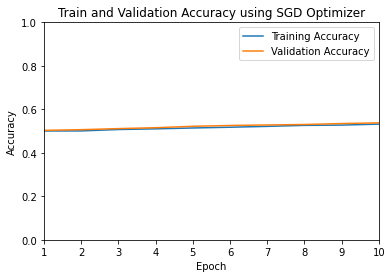

In [61]:
plt.plot(range(1,11), SGD_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), SGD_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using SGD Optimizer')
plt.legend()
plt.show()

Both accuracy are around 50%, which means SGD is not suitable

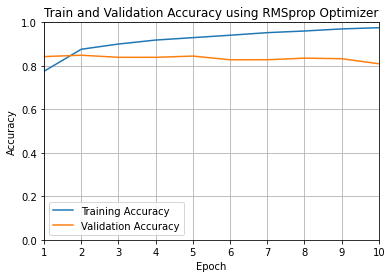

In [65]:
plt.plot(range(1,11), RMSprop_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.grid(True)
plt.legend()
plt.show()

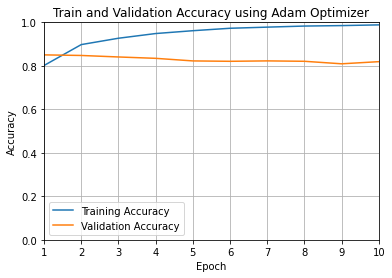

In [64]:
plt.plot(range(1,11), Adam_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), Adam_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.grid(True)
plt.legend()
plt.show()

Choose the one who has smaller gap between validation acc and training acc.